<a href="https://colab.research.google.com/github/sgpatel/MachineLearning/blob/master/Yolo_Train_Web_UI_Component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17274, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17274 (delta 1), reused 0 (delta 0), pack-reused 17271 (from 3)
Receiving objects: 100% (17274/17274), 16.13 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (11859/11859), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00

In [3]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00


In [2]:
!git clone https://huggingface.co/datasets/YashJain/UI-Elements-Detection-Dataset

Cloning into 'UI-Elements-Detection-Dataset'...
remote: Enumerating objects: 2349, done.
remote: Total 2349 (delta 0), reused 0 (delta 0), pack-reused 2349 (from 1)
Receiving objects: 100% (2349/2349), 907.66 KiB | 13.96 MiB/s, done.
Resolving deltas: 100% (655/655), done.
Updating files: 100% (3787/3787), done.
Filtering content: 100% (1855/1855), 837.41 MiB | 53.28 MiB/s, done.


In [4]:
import os
import shutil

# Define the dataset path (downloaded folder)
dataset_path = '/content/yolov5/UI-Elements-Detection-Dataset'

# Create directories for YOLO-format dataset
os.makedirs("dataset/images/train", exist_ok=True)
os.makedirs("dataset/labels/train", exist_ok=True)
os.makedirs("dataset/images/val", exist_ok=True)
os.makedirs("dataset/labels/val", exist_ok=True)

# Copy train images to the YOLO images directory.
# (Assuming train images are in /content/yolov5/UI-Elements-Detection-Dataset/train)
train_images_src = os.path.join(dataset_path, 'train')
train_images_dest = "dataset/images/train"
for file_name in os.listdir(train_images_src):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        shutil.copy(os.path.join(train_images_src, file_name), os.path.join(train_images_dest, file_name))


In [5]:
%%writefile data.yaml
train: /content/yolov5/UI-Elements-Detection-Dataset/train/images
val: /content/yolov5/UI-Elements-Detection-Dataset/val/images

names:
  0: link
  1: button
  2: input
  3: select
  4: textarea
  5: label
  6: checkbox
  7: radio
  8: dropdown
  9: slider
  10: toggle
  11: menu_item
  12: clickable
  13: icon
  14: image
  15: text
nc: 16


Writing data.yaml


In [6]:
import os

train_images_path = '/content/yolov5/UI-Elements-Detection-Dataset/train/images'
train_labels_path = '/content/yolov5/UI-Elements-Detection-Dataset/train/labels'

print("Train images:", os.listdir(train_images_path)[:5])
print("Train labels:", os.listdir(train_labels_path)[:5])


Train images: ['mostvisited_tinyurl.com_1729630335.png', 'mostvisited_cpanel.com_1729630669.png', 'education_www.khanacademy.org_1729626904.png', 'microsoft_office_www.microsoft.com_1729629782.png', 'mostvisited_bandcamp.com_1729631434.png']
Train labels: ['productivity_www.todoist.com_1729629629.txt', 'mostvisited_quora.com_1729631112.txt', 'mostvisited_com.com_1729631532.txt', 'e_commerce_www.walmart.com_1729626818.txt', 'mostvisited_google.nl_1729630997.txt']


In [25]:
!pwd

/content/yolov5


In [7]:
!pip install -r requirements.txt

In [8]:
!python train.py --img 640 --batch 16 --epochs 40 --data ./data.yaml --weights yolov5s.pt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-16 12:38:37.815298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742128718.119753    2132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742128718.202361    2132 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [9]:
from google.colab import files
files.download('runs/train/exp/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-16 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 977x1912 9 links, 9 buttons, 1 input
Speed: 64.2ms pre-process, 11.4ms inference, 1.9ms NMS per image at shape (1, 3, 352, 640)


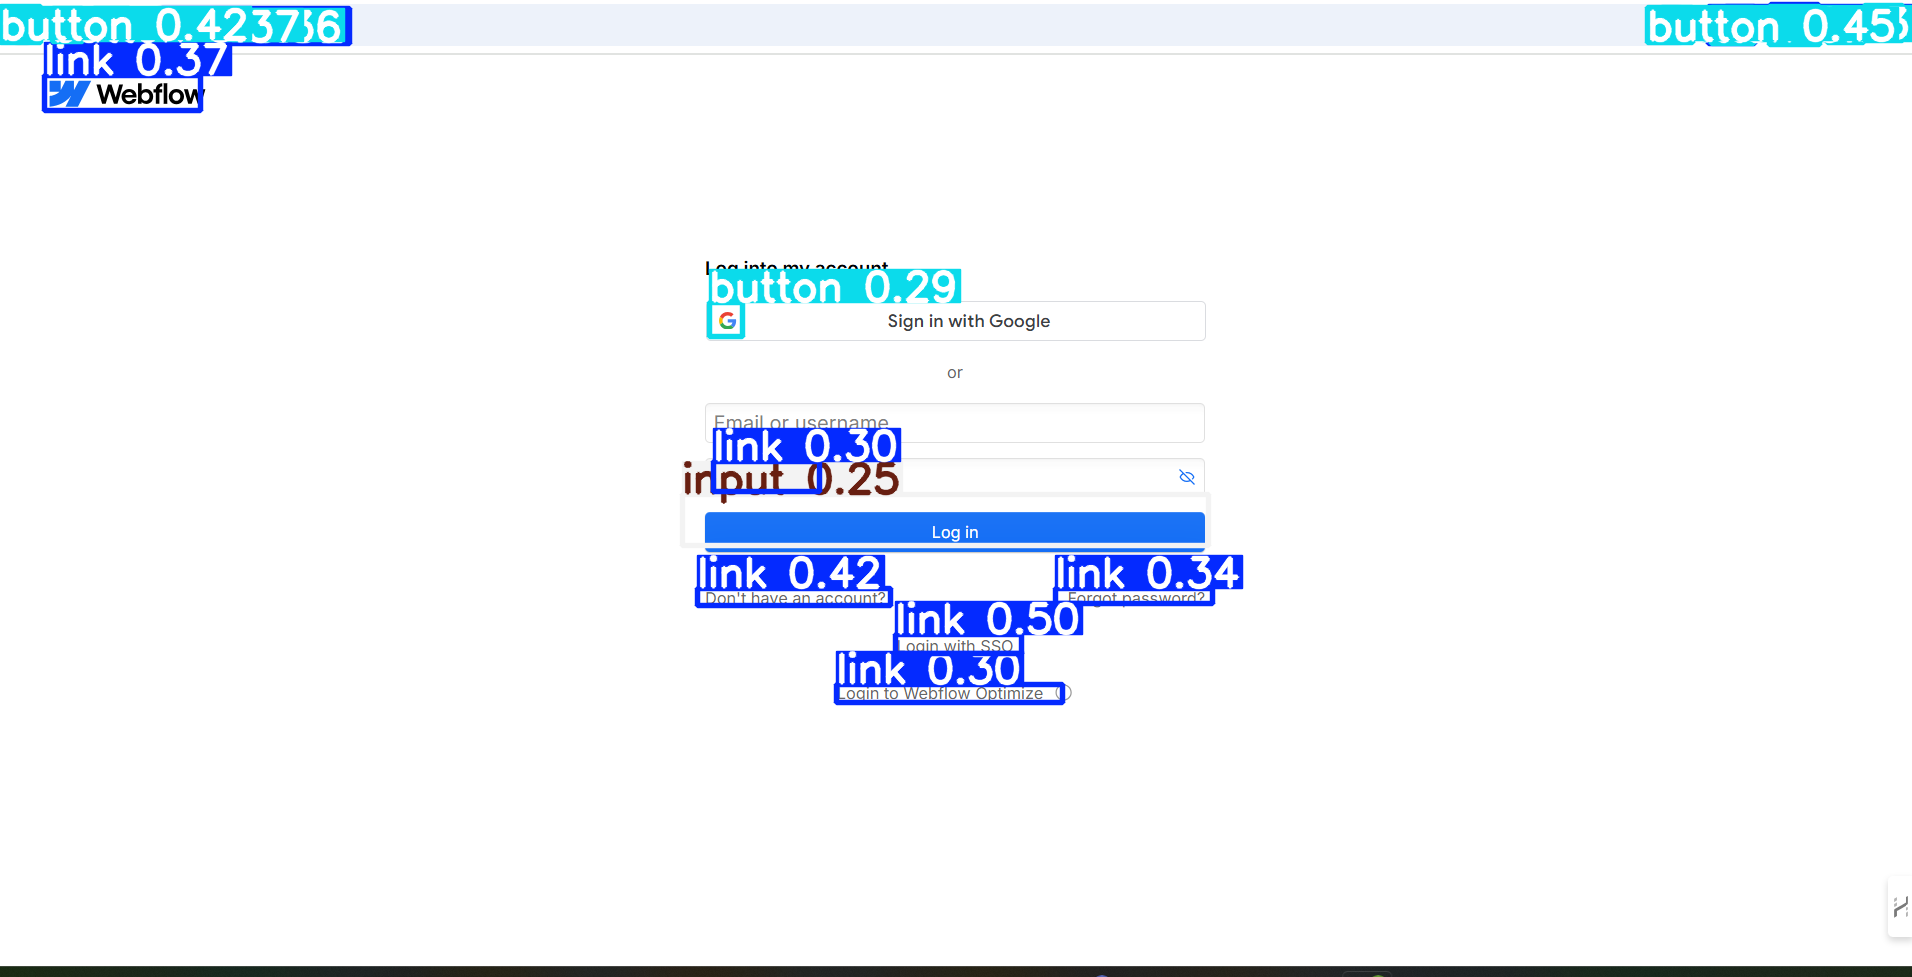

Saved 1 image to runs/detect/exp5


In [15]:
import torch

# Load the custom YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

# Run inference on an image
results = model('/content/loginpage.png')

# Print results to console
results.print()

# Display results (if running in an environment that supports image display)
results.show()

# Save the annotated image (results saved to runs/detect/exp by default)
results.save()
